Parte 1


# Importações

In [2]:
import pandas as pd
import dataframe_image as dfi
import numpy as np 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

import random as rnd

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier

import six


# Parte 1

## Ex. 1)

### a) Aprendizagem da função lógica XOR

Dados de treino e target:

In [5]:
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_data = np.array([-1, 1, 1, -1])

#### i) Efeito da taxa de aprendizagem

Para a decisão do parâmetro, correu-se com apenas 1 hidden layer com 2 neurónios no código abaixo, e com 2 layers de 4 e 2 neurónios para comparar resultados.

,Execução,r = 0.05,r = 0.25,r = 0.5,r = 1,r = 2
0,1,942,173,181,56,29
1,2,463,NA,69,NA,32
2,3,696,990,NA,89,NA
3,4,898,95,146,108,NA
4,5,898,114,62,39,25
5,6,1110,146,NA,98,NA
6,7,1115,NA,124,56,NA
7,8,2336,182,52,39,NA
8,9,583,701,80,56,23
9,10,603,267,252,33,44


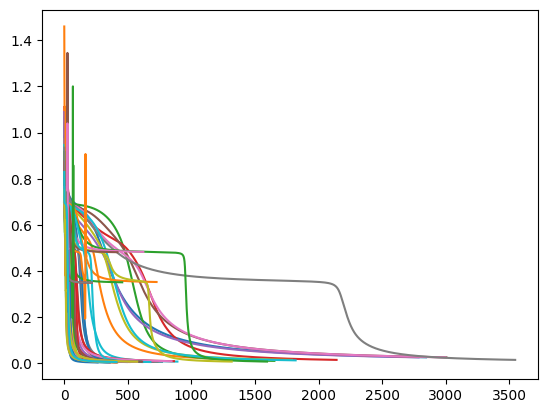

In [27]:

df_ex1a_1hiddenlayer = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])

for learning_rate_value in [0.05, 0.25, 0.5, 1, 2]:
    for i in range(10):
        mlp = MLPClassifier(hidden_layer_sizes=(4, 2), 
                                activation='tanh', 
                                solver="sgd", 
                                max_iter=10000, 
                                shuffle=False, 
                                momentum=0, 
                                learning_rate_init=learning_rate_value, 
                                tol=0.00001)
        mlp.fit(training_data, target_data)
        score_result = mlp.score(training_data, target_data)
        predict_result = mlp.predict(training_data)
        losscurve = mlp.loss_curve_
        plt.plot(mlp.loss_curve_)
        #plt.yticks(np.arange(0, max(mlp.loss_curve_), 0.05))
        score_valuecurvebelow_threshold = "NA"
        for z in range(len(losscurve)):
                if (losscurve[z] <= 0.1):
                        score_valuecurvebelow_threshold = str(z+1)
                        break
        df_ex1a_1hiddenlayer.at[i,"Execução"] = str(i+1)
        df_ex1a_1hiddenlayer.at[i,"r = " + str(learning_rate_value) + ""] = score_valuecurvebelow_threshold

df_ex1a_1hiddenlayer
#render_mpl_table(df_ex1a, header_columns=0, col_width=3.0)



,Execução,r = 0.05,r = 0.25,r = 0.5,r = 1,r = 2
0,1,NA,NA,NA,NA,NA
1,2,NA,NA,147,NA,72
2,3,1370,NA,189,168,NA
3,4,NA,601,NA,NA,NA
4,5,1928,253,NA,NA,NA
5,6,NA,348,NA,NA,87
6,7,NA,NA,207,72,55
7,8,NA,541,NA,NA,57
8,9,NA,NA,NA,NA,33
9,10,2278,NA,208,NA,NA


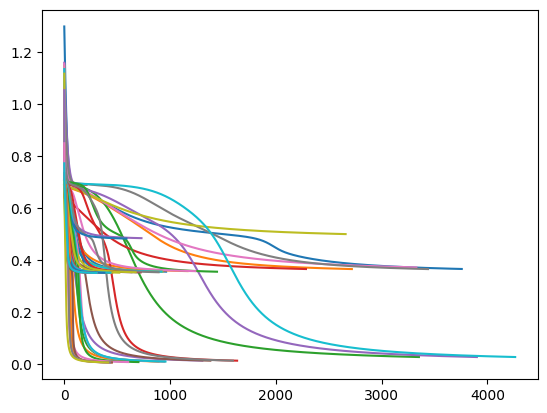

In [26]:

df_ex1a_2hiddenlayer = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])

for learning_rate_value in [0.05, 0.25, 0.5, 1, 2]:
    for i in range(10):
        mlp = MLPClassifier(hidden_layer_sizes=(2, ), 
                                activation='tanh', 
                                solver="sgd", 
                                max_iter=10000, 
                                shuffle=False, 
                                momentum=0, 
                                learning_rate_init=learning_rate_value, 
                                tol=0.00001)
        mlp.fit(training_data, target_data)
        score_result = mlp.score(training_data, target_data)
        predict_result = mlp.predict(training_data)
        losscurve = mlp.loss_curve_
        plt.plot(mlp.loss_curve_)
        score_valuecurvebelow_threshold = "NA"
        for z in range(len(losscurve)):
                if (losscurve[z] <= 0.1):
                        score_valuecurvebelow_threshold = str(z+1)
                        break
        df_ex1a_2hiddenlayer.at[i,"Execução"] = str(i+1)
        df_ex1a_2hiddenlayer.at[i,"r = " + str(learning_rate_value) + ""] = score_valuecurvebelow_threshold

df_ex1a_2hiddenlayer



#### ii) Efeito da introdução de um termo de momento

,Execução,r = 0.05,r = 0.25,r = 0.5,r = 1,r = 2
0,1,NA,81,59,NA,NA
1,2,215,63,47,NA,NA
2,3,872,65,NA,NA,33
3,4,419,46,82,36,166
4,5,511,36,22,17,28
5,6,401,47,NA,18,NA
6,7,170,29,NA,NA,NA
7,8,678,63,32,NA,NA
8,9,306,32,71,15,12
9,10,162,61,25,NA,11


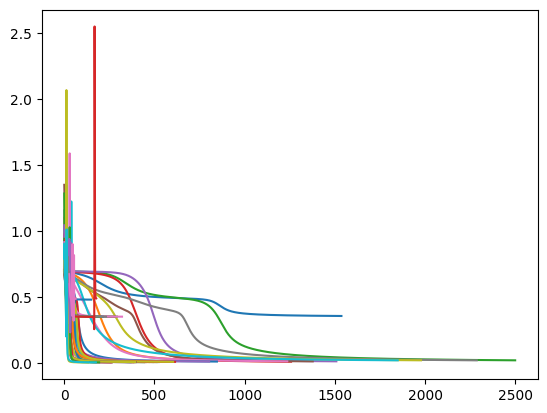

In [25]:

df_ex1b_half = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])

for learning_rate_value in [0.05, 0.25, 0.5, 1, 2]:
    for i in range(10):
        mlp = MLPClassifier(hidden_layer_sizes=(4, 2), 
                                activation='tanh', 
                                solver="sgd", 
                                max_iter=10000, 
                                shuffle=False, 
                                momentum=0.5, 
                                learning_rate_init=learning_rate_value, 
                                tol=0.00001)
        mlp.fit(training_data, target_data)
        score_result = mlp.score(training_data, target_data)
        predict_result = mlp.predict(training_data)
        losscurve = mlp.loss_curve_
        plt.plot(mlp.loss_curve_)
        score_valuecurvebelow_threshold = "NA"
        for z in range(len(losscurve)):
                if (losscurve[z] <= 0.3):
                        score_valuecurvebelow_threshold = str(z+1)
                        break
        df_ex1b_half.at[i,"Execução"] = str(i+1)
        df_ex1b_half.at[i,"r = " + str(learning_rate_value) + ""] = score_valuecurvebelow_threshold

df_ex1b_half
#render_mpl_table(df_ex1a, header_columns=0, col_width=3.0)

# o valor 2.5 no grafico é a soma entre os 2 pontos (-1 e 1) + momentum + learning rate


0.9065579543748031
0.7135837920216979
0.6881342793178078
0.8231460673980695
0.6959655067225168
0.7562282645483472
0.9526282084726208
0.7600064429025803
0.7686888134056279
0.7167602068471435
0.7915665140431642
0.7417441386512339
1.0632109775290315
0.8293754035833137
0.7397406454541182
1.0402920941962068
0.7840424496371106
0.7514165436704753
0.7576291024665499
0.8033165134515677
1.2041216744977081
0.8538237301953749
0.9606876397736865
0.720922022292814
0.8520759142059873
0.7101226738757678
0.7875573462638591
0.7431062805354322
0.8743616392248008
1.074550698615531
0.7909525834523734
0.9801400752120257
0.7952355110099593
0.7683476499497617
0.6547211780412839
0.7188031008768868
0.9880142736724861
0.7521987567766483
1.0917356310424426
0.6891198175746949
0.6856305449209589
0.8156672152098098
1.0196310715726633
0.7583080354453895
0.9378362784721198
0.6980408856235941
0.8425220653897288
0.8078338849466263
0.7092200308532355
0.7177878390357832


,Execução,r = 0.05,r = 0.25,r = 0.5,r = 1,r = 2
0,1,913,28,146,18,NA
1,2,586,NA,45,32,25
2,3,886,137,57,38,25
3,4,NA,282,218,44,25
4,5,715,294,NA,14,NA
5,6,529,197,61,139,21
6,7,390,101,61,31,NA
7,8,1039,58,45,40,NA
8,9,610,228,226,NA,42
9,10,1325,110,132,50,45


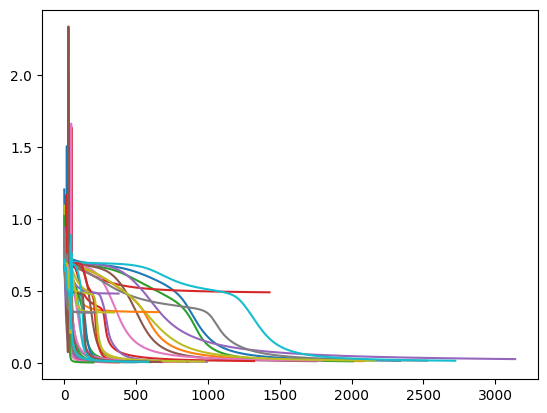

In [24]:

df_ex1b_all = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])

for learning_rate_value in [0.05, 0.25, 0.5, 1, 2]:
    for i in range(10):
        mlp = MLPClassifier(hidden_layer_sizes=(4, 2), 
                                activation='tanh', 
                                solver="sgd", 
                                max_iter=10000, 
                                shuffle=False, 
                                momentum=0, 
                                learning_rate_init=learning_rate_value, 
                                tol=0.00001)
        mlp.fit(training_data, target_data)
        score_result = mlp.score(training_data, target_data)
        predict_result = mlp.predict(training_data)
        losscurve = mlp.loss_curve_
        print(losscurve[0])
        plt.plot(mlp.loss_curve_)
        score_valuecurvebelow_threshold = "NA"
        for z in range(len(losscurve)):
                if (losscurve[z] <= 0.3):
                        score_valuecurvebelow_threshold = str(z+1)
                        break
        df_ex1b_all.at[i,"Execução"] = str(i+1)
        df_ex1b_all.at[i,"r = " + str(learning_rate_value) + ""] = score_valuecurvebelow_threshold

df_ex1b_all
#render_mpl_table(df_ex1a, header_columns=0, col_width=3.0)



#### iii) Efeito da apresentação das amostras de treino com ordem fixa ou aleatória

,Execução,r = 0.05,r = 0.25,r = 0.5,r = 1,r = 2
0,1,316,44,19,11,44
1,2,179,774,79,NA,36
2,3,771,73,23,37,29
3,4,354,98,24,12,20
4,5,139,678,81,28,297
5,6,210,61,NA,NA,NA
6,7,473,62,75,36,20
7,8,273,55,37,73,15
8,9,380,73,NA,94,13
9,10,360,86,22,29,22


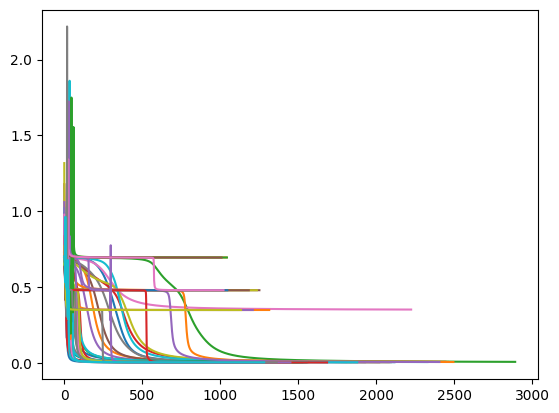

In [100]:

df_ex1c = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])

for learning_rate_value in [0.05, 0.25, 0.5, 1, 2]:
    for i in range(10):
        mlp = MLPClassifier(hidden_layer_sizes=(4, 2), 
                                activation='tanh', 
                                solver="sgd", 
                                max_iter=10000, 
                                shuffle=True, 
                                momentum=0.5, 
                                learning_rate_init=learning_rate_value, 
                                tol=0.00001, n_iter_no_change=1000)
        mlp.fit(training_data, target_data)
        score_result = mlp.score(training_data, target_data)
        predict_result = mlp.predict(training_data)
        losscurve = mlp.loss_curve_
        plt.plot(mlp.loss_curve_)
        score_valuecurvebelow_threshold = "NA"
        for z in range(len(losscurve)):
                if (losscurve[z] <= 0.4):
                        score_valuecurvebelow_threshold = str(z+1)
                        break
        df_ex1c.at[i,"Execução"] = str(i+1)
        df_ex1c.at[i,"r = " + str(learning_rate_value) + ""] = score_valuecurvebelow_threshold

df_ex1c
#render_mpl_table(df_ex1a, header_columns=0, col_width=3.0)



#### iv) Efeito de utilização de uma codificação binária ou bipolar

,Execução,r = 0.05,r = 0.25,r = 0.5,r = 1,r = 2
0,1,24,6,4,2,3
1,2,8,6,4,3,2
2,3,18,6,4,2,2
3,4,21,3,5,2,2
4,5,29,3,4,2,2
5,6,29,4,3,2,2
6,7,21,4,3,2,2
7,8,22,7,3,3,2
8,9,27,5,4,2,2
9,10,20,7,4,3,2


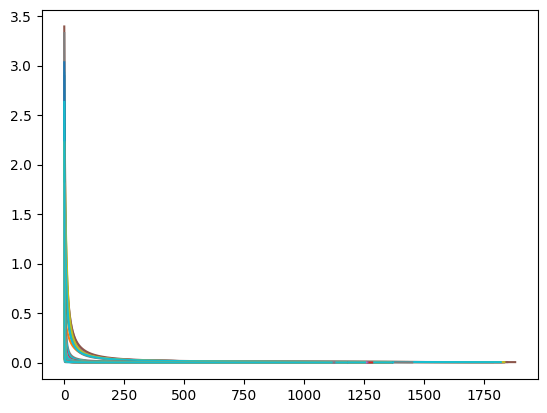

In [102]:

df_ex1d_2 = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])

target_data_binary = np.array([[-1, 1], [1, -1], [1, -1], [-1, 1]])

for learning_rate_value in [0.05, 0.25, 0.5, 1, 2]:
    for i in range(10):
        mlp = MLPClassifier(hidden_layer_sizes=(4, 2), 
                                activation='tanh', 
                                solver="sgd", 
                                max_iter=10000, 
                                shuffle=True, 
                                momentum=0.5, 
                                learning_rate_init=learning_rate_value, 
                                tol=0.00001)
        mlp.fit(training_data, target_data_binary)
        score_result = mlp.score(training_data, target_data_binary)
        predict_result = mlp.predict(training_data)
        losscurve = mlp.loss_curve_
        plt.plot(mlp.loss_curve_)
        score_valuecurvebelow_threshold = "NA"
        for z in range(len(losscurve)):
                if (losscurve[z] <= 0.4):
                        score_valuecurvebelow_threshold = str(z+1)
                        break
        df_ex1d_2.at[i,"Execução"] = str(i+1)
        df_ex1d_2.at[i,"r = " + str(learning_rate_value) + ""] = score_valuecurvebelow_threshold

df_ex1d_2
#render_mpl_table(df_ex1a, header_columns=0, col_width=3.0)



### b) Aprendizagem dos padrões de imagem 


140
140
-------
300
300


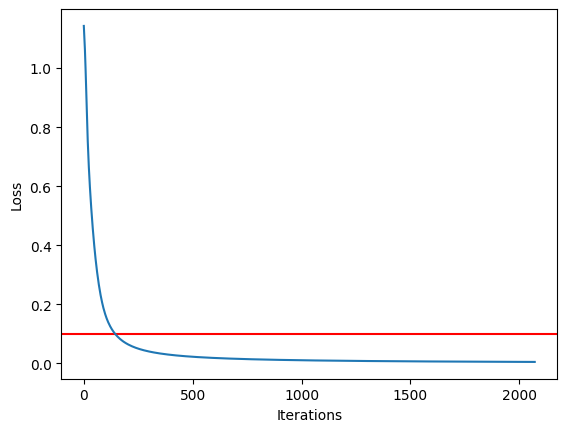

Score: 1.0
-----
PREVISÃO DOS PADRÕES
PADRÃO A: 
Array previsto: [[1 0]]
A previsão é igual ao array suposto ([1, 0])? True
PADRÃO B: 
Array previsto: [[0 1]]
A previsão é igual ao array suposto ([0, 1])? True


In [52]:
A = np.array([1, 1, 1, 1,
              1, 0, 0, 1,
              1, 0, 0, 1,
              1, 1, 1, 1])

B = np.array([1, 0, 0, 1,
              0, 1, 1, 0,
              0, 1, 1, 0,
              1, 0, 0, 1])

def random_pattern(length):
    return [[rnd.randint(0, 1) for i in range(length)]] #usar (1, 0) dá erro pq b < a

df_ex2_v1 = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])
training_array = np.concatenate([[A],[B]])
testing_array = np.array([[1, 0], [0, 1]])
print(len(training_array))
print(len(testing_array))
print("-------")

for i in range(300 - len(training_array)):
    training_array = np.append(training_array, random_pattern(16), axis=0)
    testing_array = np.append(testing_array, [[1, 1]], axis=0)

mlp = MLPClassifier(hidden_layer_sizes=(4, 2), 
                                activation='tanh', 
                                solver="sgd", 
                                max_iter=10000, 
                                shuffle=True, 
                                momentum=0.5, 
                                learning_rate_init=0.05, 
                                tol=0.00001, n_iter_no_change=1000)
mlp.fit(training_array, testing_array)


score_result = mlp.score(training_array, testing_array)
predict_result = mlp.predict(training_array)
losscurve = mlp.loss_curve_

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.plot(mlp.loss_curve_)
plt.show()
    
print("Score:", score_result)
print("-----\nPREVISÃO DOS PADRÕES")
print("PADRÃO A: " +
        "\nArray previsto: " + str(mlp.predict([A])) + 
        "\nA previsão é igual ao array suposto ([1, 0])? " + str(np.array_equal(mlp.predict([A]), np.array([[1, 0]]))))

print("PADRÃO B: " + 
        "\nArray previsto: " + str(mlp.predict([B])) + 
        "\nA previsão é igual ao array suposto ([0, 1])? " + str(np.array_equal(mlp.predict([B]), np.array([[0, 1]]))))






## Exercicio 2


Accuracy: 0.74
Confusion Matrix:
[[  0  65]
 [  0 185]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


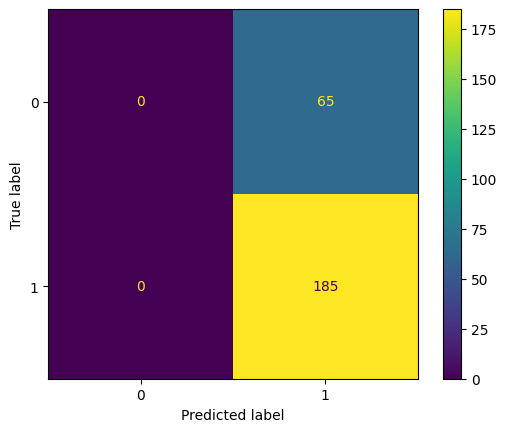

In [11]:

from sklearn import metrics

ages = np.random.randint(low=15, high=70, size=1000)

labels = []
for age in ages:
    if age < 30:
        labels.append(0)
    else:
        labels.append(1)
        
#random swap
for i in range(0, 3):
    r = np.random.randint(0, len(labels) - 1)
    if labels[r] == 0:
        labels[r] = 1
    else:
        labels[r] = 0  

X_train, X_test, y_train, y_test = train_test_split(ages.reshape(-1, 1), labels) #fazer a separação dos dados em valores de treino e teste aleatóriamente usando os valores existentes inicialmente

# é linearmente separavel pq queremos separar tudo que seja abaixo e acima de 30, e separar os que teem carta e nao teem carta
mlp = MLPClassifier(hidden_layer_sizes=(2, ), 
                                activation='tanh', 
                                solver="sgd", 
                                max_iter=1000, 
                                shuffle=True, 
                                momentum=0.5, 
                                learning_rate_init=0.05, 
                                tol=0.0001, n_iter_no_change=1000)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

# ######################
# ---- ACCURACY ------
# A accuracy mede a frequência com que o modelo é correcto.
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


# ---- confusion matrix ------
# É uma tabela que é utilizada em problemas de classificação para avaliar onde foram cometidos erros no modelo.

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
